In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [2]:
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
data = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Here we observe that we have 3 categorical features namely Surname,Geography and Gender. Rest all features are numerical ie either int or float

In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Using the describe function always provides you with interesting insights in your data. As you can see we have the mean values for tenure which could help us determine that for how long does the customer stay with the bank. There's also additional information such as the minimum and maximum balance, estimated salary etc.

In [7]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

We observe that amongst 10000 people, **2037** customers have stopped dealing with the organization. This makes up about **20%** of total customers. This is also a problem of class imbalance that needs to be dealt properly so that we can make sure that our data doesn't overfit on the condition that the customer stays. More on this later

# Exploratory Data Analysis

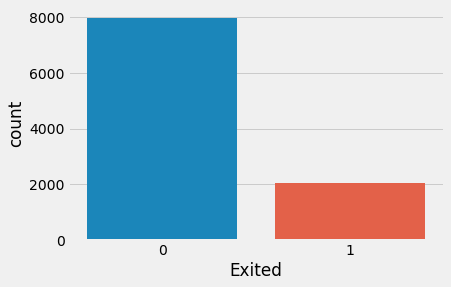

In [8]:
sns.countplot(x = 'Exited', data=data)

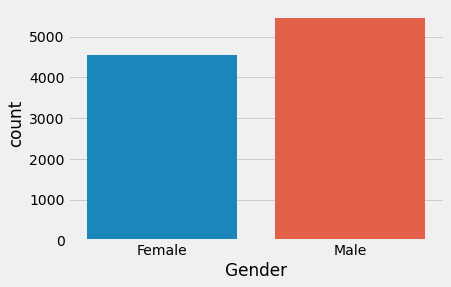

In [9]:
sns.countplot(x = 'Gender', data=data)

There's not much difference in the proportion of male and female genders as inferred from the countplot.

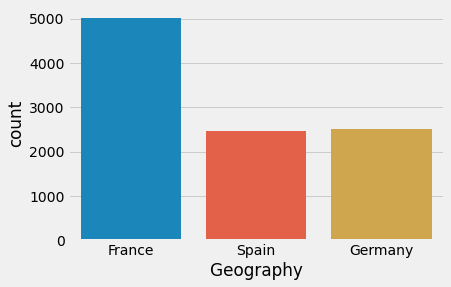

In [10]:
sns.countplot(x = 'Geography', data=data)

Most of our customers(approx 50%) live in **France** while Germany and Spain have almost the same number of customers.

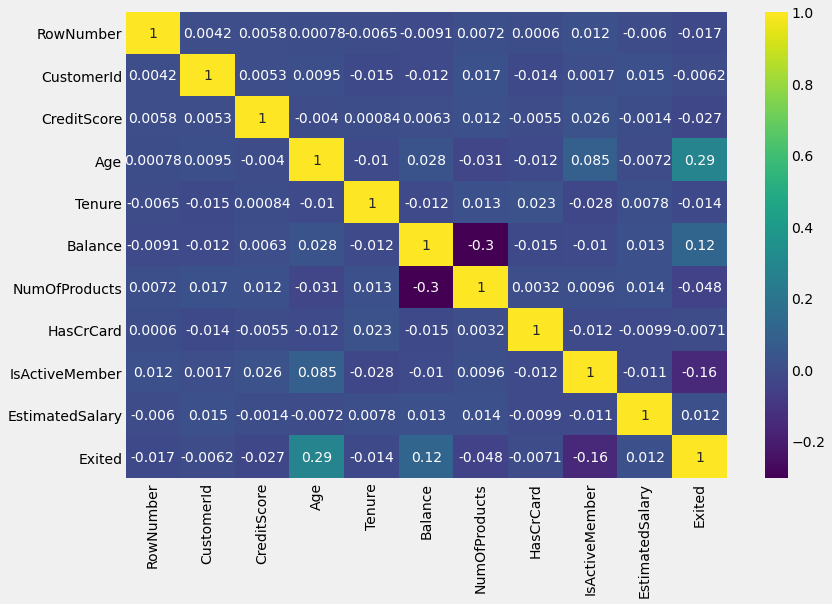

In [11]:
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(),annot=True, cmap='viridis')

Our target variable is **Exited** and from the correlation matrix we see that there are no strong correlations with any of the features corresponding to the target variable. **Age** is slightly correlated.

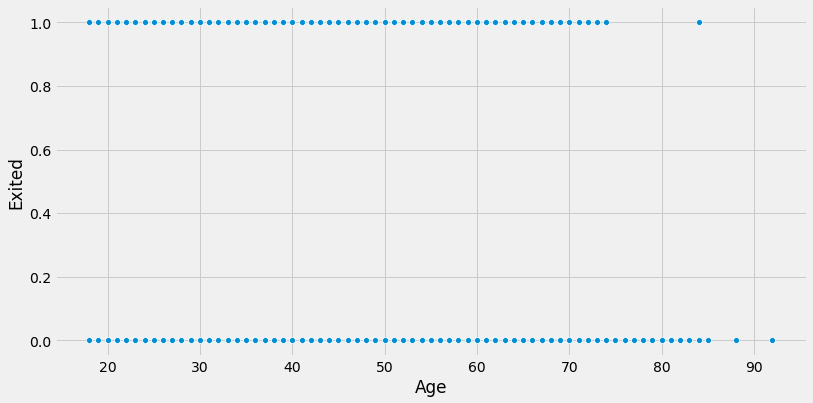

In [12]:
plt.figure(figsize = (12,6))
sns.scatterplot(x=data['Age'], y = data['Exited'])

From scatterplot you need to observe that people above the age of 73 have not exited. This means people who get old usually don't exit from the organization. There's an outlier around the age of 83 though.

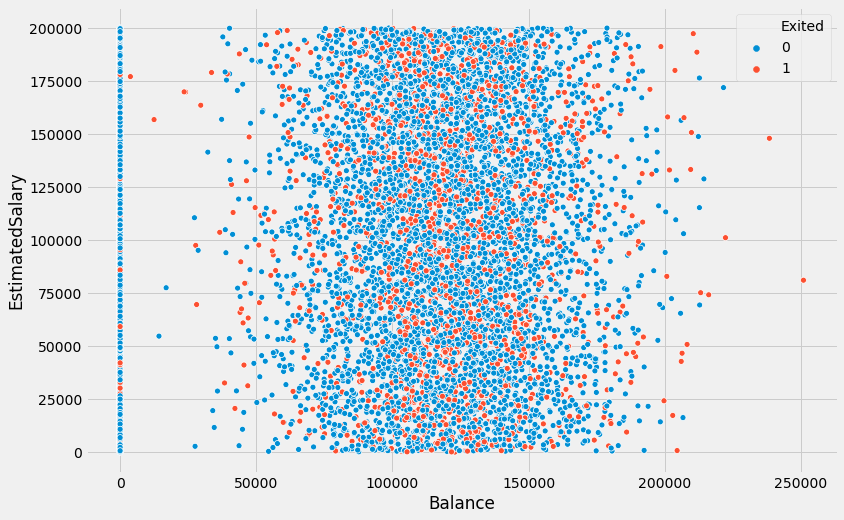

In [13]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = data['Balance'], y = data['EstimatedSalary'], hue = data['Exited'])

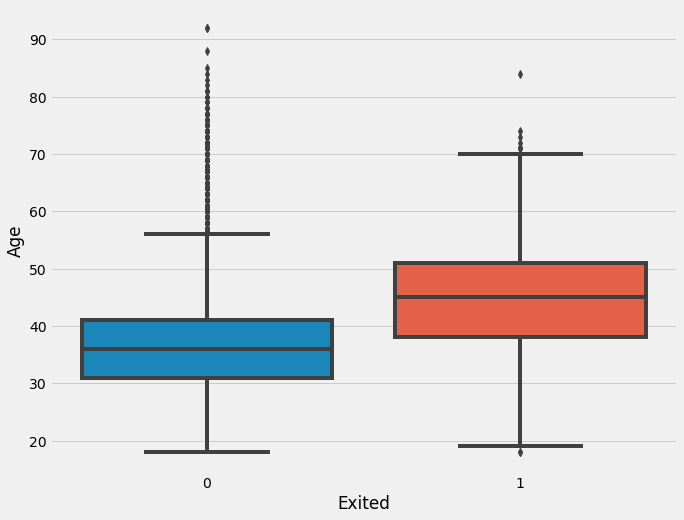

In [14]:
plt.figure(figsize = (10,8))
sns.boxplot(data=data, x = 'Exited', y = 'Age')

From the boxplot we can see that the median age of people who exit is 45 compared to 36 of the people who stay. We see a large number of outliers in the segment of people who stay.

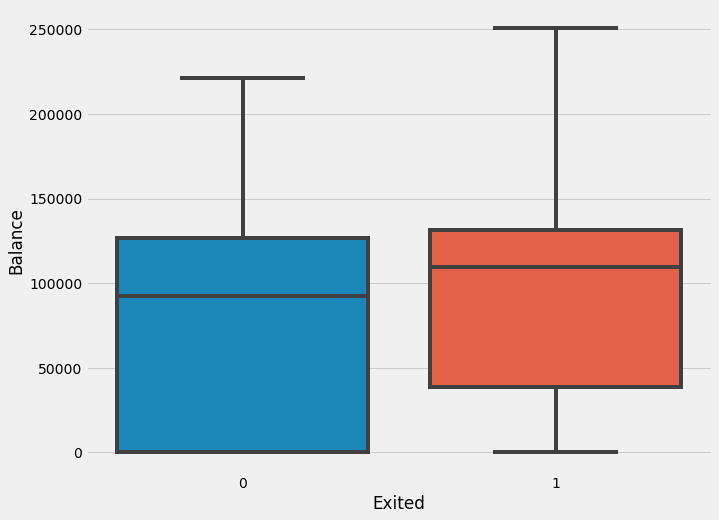

In [15]:
plt.figure(figsize = (10,8))
sns.boxplot(data=data, x = 'Exited', y = 'Balance')

We see that people who exit are having a slightly larger median balance compared to those who stay. 

In [16]:
data.groupby('IsActiveMember')['Exited'].value_counts()

IsActiveMember  Exited
0               0         3547
                1         1302
1               0         4416
                1          735
Name: Exited, dtype: int64

**45%** customers are inactive and have not exited from the organization. We can safely assume that these people either have forgotten about their account or else have kept their money in savings. The cause of concern is that **36%** customers who were active in using the services have **exited**.

In [17]:
data.groupby('IsActiveMember')['Balance'].mean()

IsActiveMember
0    77134.376863
1    75875.422145
Name: Balance, dtype: float64

Not a major difference in the balance of active and inactive members.

# Data Cleaning

In [18]:
data=pd.concat([data, pd.get_dummies(data.Geography)], axis=1)
data.drop('Geography', axis=1, inplace=True)

We now convert the Geography feature into three separate features on the basis of country and drop the Geometry feature.

In [19]:
data['Gender'] = data['Gender'].apply(lambda x : 1 if x=='Female' else 0)

We convert the Gender from categorical to numerical feature by assigning the tag of 1 to Female and 0 to Male. No sexism intended

You may wonder that why are we converting all categorical features into numerical values. The reason for doing this is that most Machine Learning algorithms **expect numerical values** as the input.
In the final step of cleaning the data we'll drop the unnecessary columns in our dataframe.

In [20]:
data.drop(columns=['RowNumber', 'CustomerId','Surname'], axis=1, inplace=True)

In [21]:
target = data['Exited']
data.drop(columns=['Exited'], axis=1, inplace=True)

In [22]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data = ss.fit_transform(data)

We standardize the data before running our model on it

In [24]:
from imblearn.over_sampling import SMOTE
k = 1
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=42)
data_res, target_res = sm.fit_resample(data, target)

The class imbalance problem is addressed by creating synthetic samples using the SMOTE (Synthetic Minority Over-sampling Technique). We could've upsampled the minority class or downsampled the majority class but that could still result in overfitting/underfitting issues. 

# Modelling

We'll allocate **80%** of our data for training and **20%** of the remaining data as test set.

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_res, target_res, test_size = 0.2, random_state = 0)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, roc_curve, classification_report,roc_auc_score
def evaluation(X_test, clf, y_test):
  y_pred = clf.predict(X_test)
  print('CLASSIFICATION REPORT')
  print(classification_report(y_test, y_pred))
      
  print('F1-Score')
  print(np.round(f1_score(y_test, y_pred)*100,2))
    
  print('Accuracy')
  accuracy = accuracy_score(y_test, y_pred)
  print(np.round(accuracy*100, 2), '%')

def plot_loss(model):
  prob=model.predict_proba(X_test)[:,1]
  fpr, tpr, thresholds=roc_curve(y_test, prob)
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1], [0,1], 'k--')
  #plt.title('Logistic Regression ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  print('AUC-ROC')
  print(np.round(roc_auc_score(y_test, prob)*100,2))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      1590
           1       0.72      0.70      0.71      1596

    accuracy                           0.71      3186
   macro avg       0.71      0.71      0.71      3186
weighted avg       0.71      0.71      0.71      3186

F1-Score
70.98
Accuracy
71.16 %
AUC-ROC
77.42


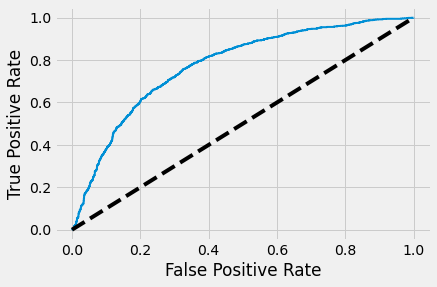

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
evaluation(X_test, lr, y_test)
plot_loss(lr)

We got an accuracy of 71% and auc roc score of 77.4 using Logistic Regression. Let's see if other algorithm gives us better results.

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.86      0.82      0.83      1590
           1       0.82      0.86      0.84      1596

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186

F1-Score
84.3
Accuracy
83.9 %
AUC-ROC
83.89


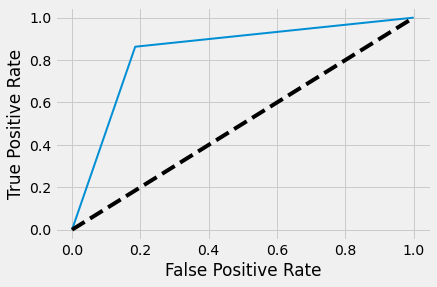

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
evaluation(X_test, dtc, y_test)
plot_loss(dtc)

Using Decision Tree Classifier we got an accuracy and auc roc score of 84.21. This is a lot better than Logistic Regression

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1590
           1       0.79      0.80      0.80      1596

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186

F1-Score
79.81
Accuracy
79.69 %
AUC-ROC
87.97


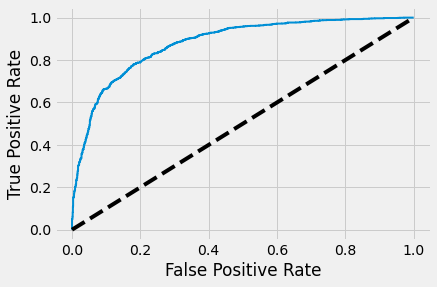

In [29]:
from sklearn.svm import SVC
svc_model=SVC(probability=True)
svc_model.fit(X_train, y_train)
evaluation(X_test, svc_model, y_test)
plot_loss(svc_model)

Using SVC we got accuracy and roc-auc score of 79.69. This is better than Logistic Regression but Decison Tree is best amongst all three.

**We will work with a boosting algorithm, namely - Adaboost.We won't set any base estimator as by default it is DecisionTreeClassifier. And we will boost with Decision tree only as in the previous stage we saw decision tree gave a better accuracy.**

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1590
           1       0.81      0.80      0.81      1596

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186

F1-Score
80.51
Accuracy
80.67 %
AUC-ROC
88.43


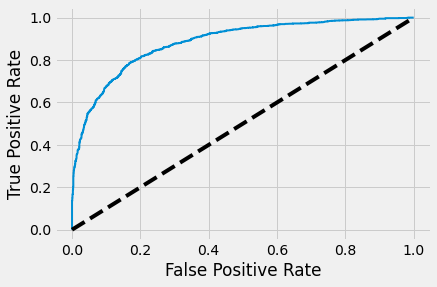

In [30]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
evaluation(X_test, abc, y_test)
plot_loss(abc)

And now we get a better accuracy. And here's the beauty of boosting.